<a href="https://colab.research.google.com/github/AruneshTamboli/Marketing-Campaign-Performance-Analysis/blob/main/Marketing_Campaign_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# # 🚀 Marketing Campaign Performance Analysis
# **Objective:**
# Compare Google Ads and Facebook Ads performance, join with leads data, and uncover which channel gives better ROI.

# ---

# ## 1. Data Overview
# We have three datasets:
# - **Google Ads** → campaign spend, clicks, impressions
# - **Facebook Ads** → adset spend, clicks, reach
# - **Leads** → lead details, source (Google Ads / Facebook Ads / Referral), status


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 1️⃣ Import libraries & load data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted", font_scale=1.1)
# 3️⃣ Define file paths (update with your file names)
# file1 = '/content/drive/MyDrive/Personal Projects/Project- Analysis for Marketing companies/input data/google_ads.csv'
# file2 = '/content/drive/MyDrive/Personal Projects/Project- Analysis for Marketing companies/input data/facebook_ads.csv'
# file3 = '/content/drive/MyDrive/Personal Projects/Project- Analysis for Marketing companies/input data/leads.csv'

google_df = pd.read_csv('/content/drive/MyDrive/Personal Projects/Project- Analysis for Marketing companies/input data/google_ads.csv')
facebook_df = pd.read_csv('/content/drive/MyDrive/Personal Projects/Project- Analysis for Marketing companies/input data/facebook_ads.csv')
leads_df = pd.read_csv('/content/drive/MyDrive/Personal Projects/Project- Analysis for Marketing companies/input data/leads.csv')

display(google_df.head(), facebook_df.head(), leads_df.head())


,id,Date,Campaign,Impressions,clicks,Cost
0,1,2025-07-20,Retargeting,15406,657,3844.65
1,2,2025-08-03,Brand Awareness,29396,2828,4034.76
2,3,2025-07-21,Brand Awareness,92766,246,2764.10
3,4,2025-07-27,Brand Awareness,28283,2722,806.87
4,5,2025-08-05,Brand Awareness,7128,3168,1419.16


,id,Date,AdSet,Reach,Clicks,Spend
0,1,2025-07-26,Video Views,8841,3099,3737.19
1,2,2025-08-16,Retargeting,65223,667,2231.01
2,3,2025-08-15,Retargeting,6100,2278,855.52
3,4,2025-08-17,Engagement Boost,74433,3117,1293.34
4,5,2025-07-26,Lookalike Audience,52500,1942,1139.29


,id,Date,Lead_Name,Email,Source,Status
0,1,2025-08-08,Laverna Petrulis,lpetrulis0@lulu.com,Google Ads,Contacted
1,2,2025-08-11,Milt Gregan,mgregan1@ask.com,Referral,New
2,3,2025-07-29,Farrah Woodrup,fwoodrup2@omniture.com,Google Ads,Qualified
3,4,2025-08-10,Irita Sivewright,isivewright3@dedecms.com,Website,Won
4,5,2025-08-05,Isadore Keightley,ikeightley4@topsy.com,Website,Lost


In [ ]:
## 2. Data Cleaning
- Remove duplicates
- Standardize columns
- Prepare data for joins


SyntaxError: invalid syntax (ipython-input-4058152593.py, line 2)

In [ ]:
# 2️⃣ Remove duplicates
google_df = google_df.drop_duplicates()
facebook_df = facebook_df.drop_duplicates()
leads_df = leads_df.drop_duplicates()


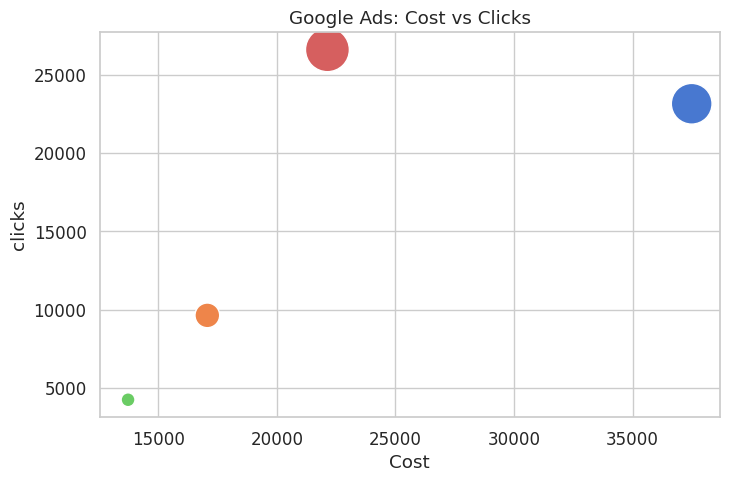

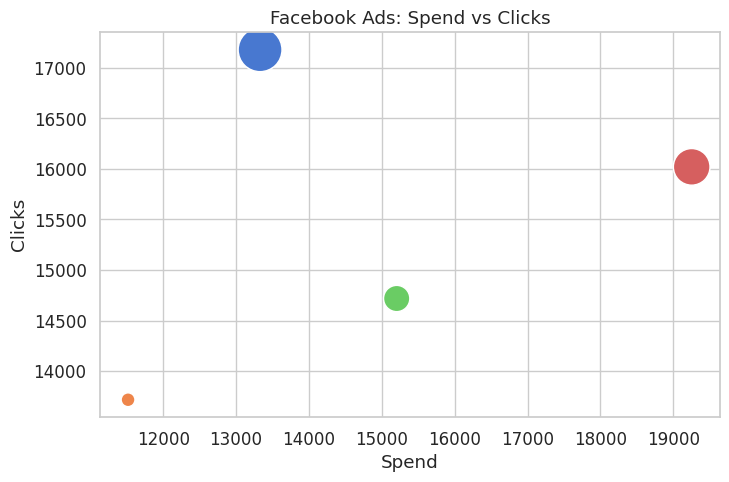

In [ ]:
# ## 3. Campaign Performance
# Compare spend vs clicks across campaigns/ad sets.
# 3️⃣ Google Campaign scatter
google_campaign = google_df.groupby('Campaign').agg({'Cost':'sum','clicks':'sum'}).reset_index()

plt.figure(figsize=(8,5))
sns.scatterplot(data=google_campaign, x='Cost', y='clicks', size='clicks', hue='Campaign', legend=False, sizes=(100,1000))
plt.title("Google Ads: Cost vs Clicks")
plt.show()

# Facebook AdSet scatter
facebook_adset = facebook_df.groupby('AdSet').agg({'Spend':'sum','Clicks':'sum'}).reset_index()

plt.figure(figsize=(8,5))
sns.scatterplot(data=facebook_adset, x='Spend', y='Clicks', size='Clicks', hue='AdSet', legend=False, sizes=(100,1000))
plt.title("Facebook Ads: Spend vs Clicks")
plt.show()


In [ ]:
# ## 4. Leads Integration
# Join ads performance with leads to calculate **Cost per Lead (CPL)**.
# Leads summary
leads_summary = leads_df.groupby('Source').agg(
    total_leads=('id','count'),
    contacted_leads=('Status', lambda x: (x=='Contacted').sum())
).reset_index()

# Ads summary
google_summary = pd.DataFrame({
    'total_cost': [google_df['Cost'].sum()],
    'total_clicks': [google_df['clicks'].sum()],
    'Source': ['Google Ads']
})

facebook_summary = pd.DataFrame({
    'total_cost': [facebook_df['Spend'].sum()],
    'total_clicks': [facebook_df['Clicks'].sum()],
    'Source': ['Facebook Ads']
})


ads_summary = pd.concat([google_summary, facebook_summary])
final_summary = ads_summary.merge(leads_summary, on='Source', how='left')
final_summary['CPL'] = final_summary['total_cost'] / final_summary['total_leads']

display(final_summary)

,total_cost,total_clicks,Source,total_leads,contacted_leads,CPL
0,90422.83,63649,Google Ads,14,4,6458.773571
1,59301.69,61635,Facebook Ads,6,3,9883.615000


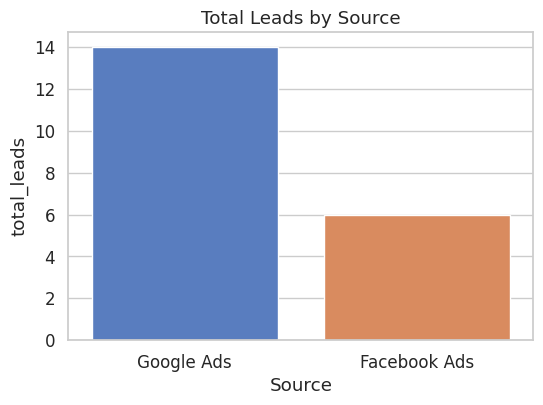

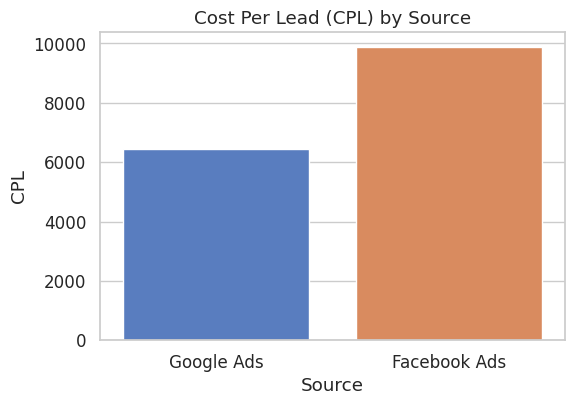

In [ ]:
# ## 5. ROI Visualization
# Compare **Total Leads** and **CPL** per channel.
# Total Leads
plt.figure(figsize=(6,4))
sns.barplot(data=final_summary, x='Source', y='total_leads', hue='Source', dodge=False)
plt.title("Total Leads by Source")
plt.show()

# CPL
plt.figure(figsize=(6,4))
sns.barplot(data=final_summary, x='Source', y='CPL', hue='Source', dodge=False)
plt.title("Cost Per Lead (CPL) by Source")
plt.show()


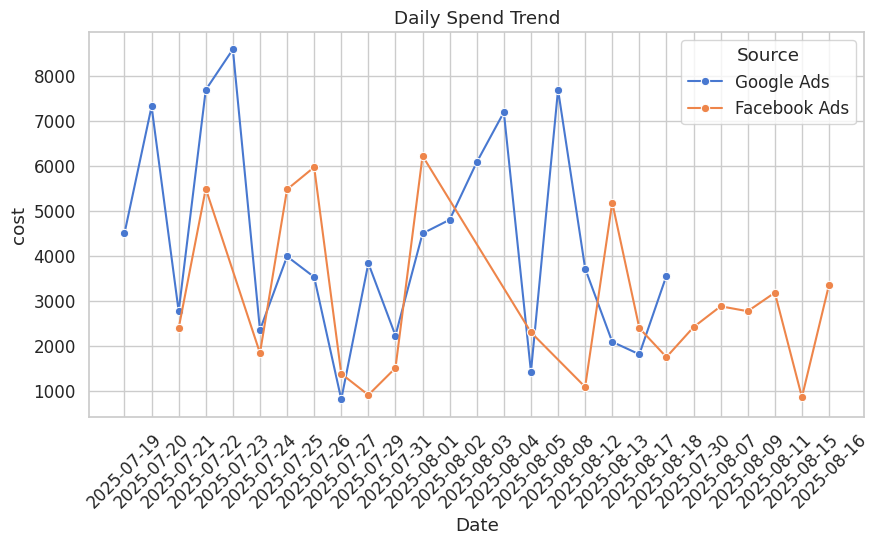

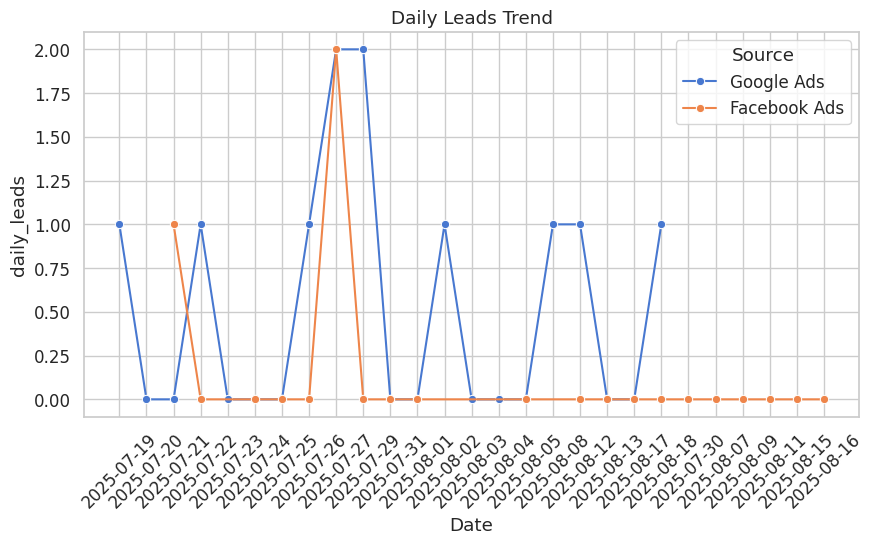

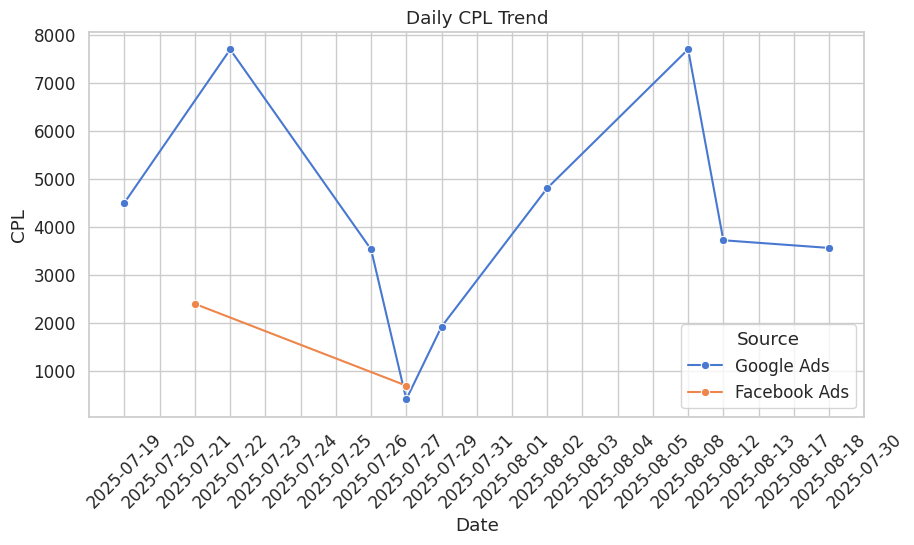

In [ ]:
# ## 6. Time Series Analysis
# Trends of spend, leads, and CPL over time.
# Prepare daily spend
google_trend = google_df.groupby('Date').agg(cost=('Cost','sum')).reset_index()
google_trend['Source'] = 'Google Ads'

facebook_trend = facebook_df.groupby('Date').agg(cost=('Spend','sum')).reset_index()
facebook_trend['Source'] = 'Facebook Ads'

trend = pd.concat([google_trend, facebook_trend])
leads_trend = leads_df.groupby(['Date','Source']).agg(daily_leads=('id','count')).reset_index()
trend = trend.merge(leads_trend, on=['Date','Source'], how='left').fillna(0)

# Compute CPL
trend['CPL'] = trend.apply(lambda r: r['cost']/r['daily_leads'] if r['daily_leads']>0 else None, axis=1)

# Plots
plt.figure(figsize=(10,5))
sns.lineplot(data=trend, x='Date', y='cost', hue='Source', marker="o")
plt.title("Daily Spend Trend")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,5))
sns.lineplot(data=trend, x='Date', y='daily_leads', hue='Source', marker="o")
plt.title("Daily Leads Trend")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,5))
sns.lineplot(data=trend, x='Date', y='CPL', hue='Source', marker="o")
plt.title("Daily CPL Trend")
plt.xticks(rotation=45)
plt.show()


## 7. Insights & Conclusion
- Which channel drives **more leads**?  
- Which channel is **cheaper per lead**?  
- Are there days where spend spiked but leads didn’t follow?  
- Trend of **efficiency (CPL)** over time.  

✅ This tells a **clear business story**: not just “data cleaning,” but **actionable marketing insights.**
